<a href="https://colab.research.google.com/github/ankur715/Finance_Analytics/blob/master/Stocks_2010_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stocks 
### _AAPL, MSFT, GOOG, AMZN_

Introduction:

The stocks of selected big technology companies such as Apple, Microsoft, Google, and Amazon were analyzed. Then, a predictive model was developed to predict the stock price. The historical data used for this project is from 2010 to 2020. The steps performed to create the machine learning pipeline for this analysis is as following.

 - Extract historical data for selected stocks
 - Explore the data structure
 - Explore the trends of the Open Price and Volume
 - Develop a neural network predictive model for AMZN using historical data 


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow
from pandas.plotting import scatter_matrix


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# library to extract historical stocks data 
import yfinance as yf

start = "2010-01-01"
end = "2020-12-31"

aapl = yf.download('AAPL',start,end)
msft = yf.download('MSFT',start,end)
goog = yf.download('GOOG',start,end)
amzn = yf.download('AMZN',start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
aapl.columns = ["AAPL - Open", "AAPL - High", "AAPL - Low",
                "AAPL - Close", "AAPL - Adj Close", "AAPL - Volume"]
aapl

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546385,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430345,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801270,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480576,124486200


In [ ]:
msft.columns = ["MSFT - Open", "MSFT - High", "MSFT - Low",
                "MSFT - Close", "MSFT - Adj Close", "MSFT - Volume"]
msft

,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,MSFT - Adj Close,MSFT - Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.800226,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.807913,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.661806,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.415724,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.577217,51197400
...,...,...,...,...,...,...
2020-12-23,223.110001,223.559998,220.800003,221.020004,218.222198,18699600
2020-12-24,221.419998,223.610001,221.199997,222.750000,219.930313,10550600
2020-12-28,224.449997,226.029999,223.020004,224.960007,222.112335,17933500


In [ ]:
goog.columns = ["GOOG - Open", "GOOG - High", "GOOG - Low",
                "GOOG - Close", "GOOG - Adj Close", "GOOG - Volume"]
goog

,GOOG - Open,GOOG - High,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927065
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031925
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876685
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9484016
...,...,...,...,...,...,...
2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800
2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000


In [ ]:
amzn.columns = ["AMZN - Open", "AMZN - High", "AMZN - Low",
                "AMZN - Close", "AMZN - Adj Close", "AMZN - Volume"]
amzn

,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
Date,,,,,,
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800


In [ ]:
# combining the stocks tables together into one
stocks_data = pd.concat([aapl, msft, goog, amzn], axis=1)
stocks_data.head()

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,...,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600,30.620001,31.100000,30.590000,30.950001,...,310.954468,312.204773,312.204773,3927065,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546385,601904800,30.850000,31.100000,30.639999,30.959999,...,309.609497,310.829926,310.829926,6031925,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000,30.879999,31.080000,30.520000,30.770000,...,302.047852,302.994293,302.994293,7987226,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430345,477131200,30.629999,30.700001,30.190001,30.450001,...,295.218445,295.940735,295.940735,12876685,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800,30.280001,30.879999,30.240000,30.660000,...,293.455048,299.885956,299.885956,9484016,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


In [ ]:
# top 5 rows
stocks_data.head()

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,...,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600,30.620001,31.100000,30.590000,30.950001,...,310.954468,312.204773,312.204773,3927065,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546385,601904800,30.850000,31.100000,30.639999,30.959999,...,309.609497,310.829926,310.829926,6031925,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000,30.879999,31.080000,30.520000,30.770000,...,302.047852,302.994293,302.994293,7987226,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430345,477131200,30.629999,30.700001,30.190001,30.450001,...,295.218445,295.940735,295.940735,12876685,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800,30.280001,30.879999,30.240000,30.660000,...,293.455048,299.885956,299.885956,9484016,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


In [ ]:
# last 5 rows
stocks_data.tail()

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,...,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,129.801270,88223700,223.110001,223.559998,220.800003,221.020004,...,1725.040039,1732.380005,1732.380005,1033800,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800
2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802353,54930100,221.419998,223.610001,221.199997,222.750000,...,1729.109985,1738.849976,1738.849976,346800,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480576,124486200,224.449997,226.029999,223.020004,224.960007,...,1746.334961,1776.089966,1776.089966,1393000,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676651,121047300,226.309998,227.179993,223.580002,224.149994,...,1756.089966,1758.719971,1758.719971,1299400,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900
2020-12-30,135.580002,135.990005,133.399994,133.720001,132.536835,96452100,225.229996,225.630005,221.470001,221.679993,...,1725.599976,1739.520020,1739.520020,1306100,3341.000000,3342.100098,3282.469971,3285.850098,3285.850098,3209300


In [ ]:
# data structure and type
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2010-01-04 to 2020-12-30
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AAPL - Open       2768 non-null   float64
 1   AAPL - High       2768 non-null   float64
 2   AAPL - Low        2768 non-null   float64
 3   AAPL - Close      2768 non-null   float64
 4   AAPL - Adj Close  2768 non-null   float64
 5   AAPL - Volume     2768 non-null   int64  
 6   MSFT - Open       2768 non-null   float64
 7   MSFT - High       2768 non-null   float64
 8   MSFT - Low        2768 non-null   float64
 9   MSFT - Close      2768 non-null   float64
 10  MSFT - Adj Close  2768 non-null   float64
 11  MSFT - Volume     2768 non-null   int64  
 12  GOOG - Open       2768 non-null   float64
 13  GOOG - High       2768 non-null   float64
 14  GOOG - Low        2768 non-null   float64
 15  GOOG - Close      2768 non-null   float64
 16  GOOG - Adj Close  2768 n

In [ ]:
# descriptive statistics of the columns
stocks_data.describe()

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,...,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000,2768.000000,2768.000000,...,2768.000000,2768.000000,2768.000000,2.768000e+03,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,33.728134,34.077876,33.378027,33.741802,31.799784,2.866839e+08,68.736084,69.386019,68.055527,68.757139,...,713.195755,720.068428,720.068428,3.172210e+06,858.677547,867.772145,848.358172,858.503042,858.503042,4.566307e+06
std,24.491872,24.826065,24.152944,24.505122,24.759928,2.289595e+08,51.315905,51.899952,50.695262,51.327670,...,391.996381,396.395423,396.395423,2.648713e+06,816.173068,825.521427,805.089323,815.563986,815.563986,2.791189e+06
min,6.870357,7.000000,6.794643,6.858929,5.864506,4.544800e+07,23.090000,23.320000,22.730000,23.010000,...,216.005356,217.220810,217.220810,7.922000e+03,105.930000,111.290001,105.800003,108.610001,108.610001,8.813000e+05
25%,17.513124,17.688125,17.332232,17.480178,15.329944,1.211411e+08,30.250000,30.497500,30.030001,30.257500,...,336.340553,339.487526,339.487526,1.416325e+06,243.097496,246.475006,241.187500,243.910000,243.910000,2.856075e+06
50%,26.972500,27.221251,26.705000,26.985000,24.755188,2.030340e+08,46.945000,47.455000,46.545000,47.004999,...,595.766937,599.727081,599.727081,2.158950e+06,439.805008,444.854996,435.985001,439.745010,439.745010,3.895850e+06
75%,43.003125,43.339376,42.589999,42.973751,41.285425,3.890908e+08,94.055002,95.142500,92.955002,93.954998,...,1044.982513,1056.012543,1056.012543,4.242026e+06,1495.344971,1525.730011,1478.605011,1500.062500,1500.062500,5.386175e+06
max,138.050003,138.789993,134.339996,136.690002,135.480576,1.880998e+09,229.270004,232.860001,227.350006,231.649994,...,1822.650024,1827.989990,1827.989990,2.976073e+07,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,4.242110e+07


In [ ]:
# saving the stocks data as csv
stocks_data.to_csv('stocks_data_2010-2020.csv')

In [ ]:
# reading saved AAPL stocks from 2010-2020
df = pd.read_csv('stocks_data_2010-2020.csv', header=0, index_col='Date')
df.head()

,AAPL - Open,AAPL - High,AAPL - Low,AAPL - Close,AAPL - Adj Close,AAPL - Volume,MSFT - Open,MSFT - High,MSFT - Low,MSFT - Close,...,GOOG - Low,GOOG - Close,GOOG - Adj Close,GOOG - Volume,AMZN - Open,AMZN - High,AMZN - Low,AMZN - Close,AMZN - Adj Close,AMZN - Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535084,493729600,30.620001,31.100000,30.590000,30.950001,...,310.954468,312.204773,312.204773,3927065,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546385,601904800,30.850000,31.100000,30.639999,30.959999,...,309.609497,310.829926,310.829926,6031925,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000,30.879999,31.080000,30.520000,30.770000,...,302.047852,302.994293,302.994293,7987226,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430345,477131200,30.629999,30.700001,30.190001,30.450001,...,295.218445,295.940735,295.940735,12876685,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800,30.280001,30.879999,30.240000,30.660000,...,293.455048,299.885956,299.885956,9484016,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


In [ ]:
# size of the data
df.shape

(2768, 24)

The historical stocks data for the big 4 companies was extracted from 2010 to 2020 using yfinance, which is an open-source library by Yahoo Finance. The values of Open, High, Low, Close, Adjusted Close, and Volume were included for the 4 stocks. The data structure was collected and there were 2768 entries from 2010-01-04 to 2020-12-30. Those dates were the opening days of the week, which is Monday except for holidays. The descriptive statistics was also analyzed to get the count, mean, standard deviation, and the interquartile range. The stocks data was saved because it's always safe to have a copy of the data for which you analyze.

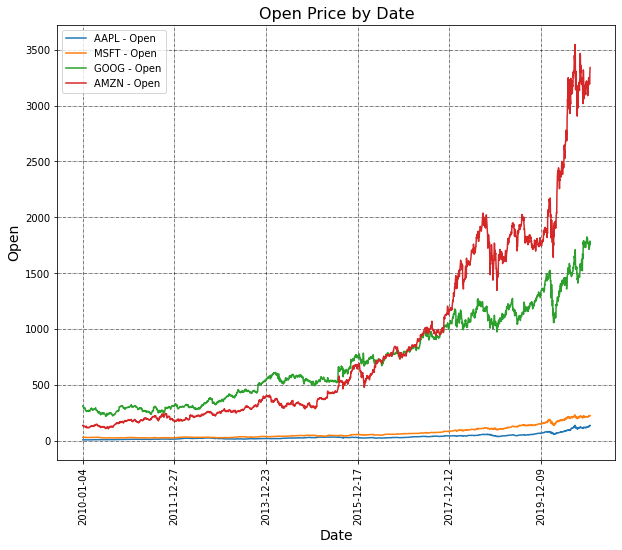

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

# plotting the Open prices from 2010 to 2018
df[["AAPL - Open", "MSFT - Open", "GOOG - Open", "AMZN - Open"]].plot()

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Open Price by Date", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Open', fontsize=14)
plt.xlabel('Date', fontsize=14)

# Rotate x-ticks 
plt.xticks(rotation = 90) 

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

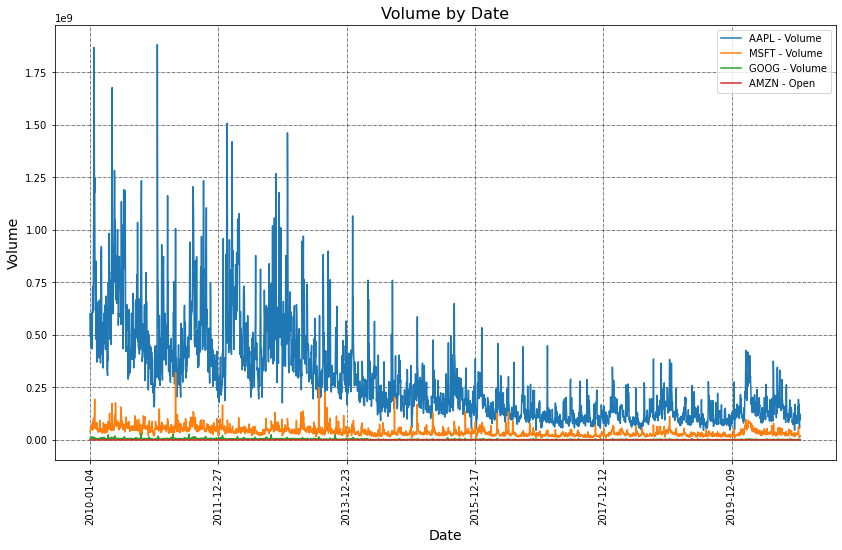

In [ ]:
plt.rcParams["figure.figsize"] = (14,8)

# plotting the Volume prices from 2010 to 2018
df[["AAPL - Volume", "MSFT - Volume", "GOOG - Volume", "AMZN - Open"]].plot()

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Volume by Date", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Volume', fontsize=14)
plt.xlabel('Date', fontsize=14)

# Rotate x-ticks
plt.xticks(rotation = 90) 

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

The open price for the 4 stocks were visualized for 2010 to 2020. Although Apple and Microsoft prices increased steadily, Google and Amazon prices were more volatile. In the last several years, they all increased at a higher rate compared to before. For 2020, the volatility was extremely high for all the stocks in Finance industry. When COVID started, there was a significant down trend, but after that dip, it hiked up significantly. The volatility remained high and is still remains high in the current time. The volume was also visualized, which shows the volume generally decreasing over time. Since the prices increased, the volume decreased since there must be stability.

In [ ]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=stocks_data.index,y=stocks_data["AAPL - Open"],name='Price'),secondary_y=False)
fig2.add_trace(go.Bar(x=stocks_data.index,y=stocks_data['AAPL - Volume'],name='Volume'),secondary_y=True)
fig2.show()

In [ ]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=stocks_data.index,
                              open=stocks_data['AAPL - Open'],
                              high=stocks_data['AAPL - High'],
                              low=stocks_data['AAPL - Low'],
                              close=stocks_data['AAPL - Close'],
                             ))

In [ ]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=stocks_data.index,y=stocks_data["MSFT - Open"],name='Price'),secondary_y=False)
fig2.add_trace(go.Bar(x=stocks_data.index,y=stocks_data['MSFT - Volume'],name='Volume'),secondary_y=True)
fig2.show()



In [ ]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=stocks_data.index,
                              open=stocks_data['MSFT - Open'],
                              high=stocks_data['MSFT - High'],
                              low=stocks_data['MSFT - Low'],
                              close=stocks_data['MSFT - Close'],
                             ))

In [ ]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=stocks_data.index,y=stocks_data["GOOG - Open"],name='Price'),secondary_y=False)
fig2.add_trace(go.Bar(x=stocks_data.index,y=stocks_data['GOOG - Volume'],name='Volume'),secondary_y=True)
fig2.show()



In [ ]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=stocks_data.index,
                              open=stocks_data['GOOG - Open'],
                              high=stocks_data['GOOG - High'],
                              low=stocks_data['GOOG - Low'],
                              close=stocks_data['GOOG - Close'],
                             ))

In [ ]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=stocks_data.index,y=stocks_data["AMZN - Open"],name='Price'),secondary_y=False)
fig2.add_trace(go.Bar(x=stocks_data.index,y=stocks_data['AMZN - Volume'],name='Volume'),secondary_y=True)
fig2.show()



In [ ]:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=stocks_data.index,
                              open=stocks_data['AMZN - Open'],
                              high=stocks_data['AMZN - High'],
                              low=stocks_data['AMZN - Low'],
                              close=stocks_data['AMZN - Close'],
                             ))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe27474b210>,
      dtype=object)

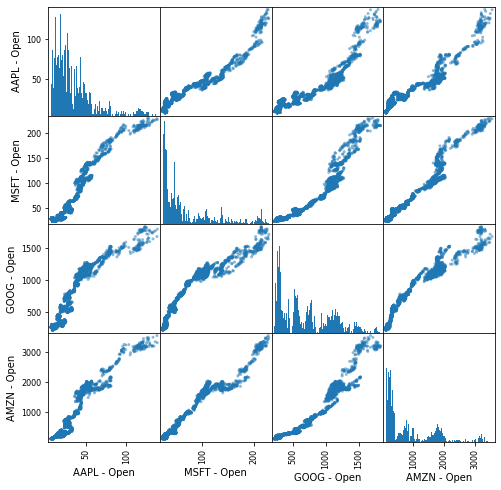

In [ ]:
# scatter plot matrix
scatter_matrix(df[["AAPL - Open", "MSFT - Open", "GOOG - Open", "AMZN - Open"]], 
               figsize = (8,8), hist_kwds= {'bins':250})



The graph above shows a combination of histograms for each company stock and a subsequent scatterplot. They show a linear correlation between the companies.

In [ ]:
### making predictive model only for AMZN

# selecting only Open column to use for model
# The reshape allows you to add dimensions or change the number of elements in each dimension. 
# We are using reshape(-1, 1) because we have just one dimension in our array, 
# so numby will create the same number of our rows and add one more axis: 1 to be the second dimension.
df = df["AMZN - Open"].values
df = df.reshape(-1, 1)
df

array([[ 136.25      ],
       [ 133.42999268],
       [ 134.6000061 ],
       ...,
       [3194.        ],
       [3309.93994141],
       [3341.        ]])

In [ ]:
# splitting into train and test by 80-20% 
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [ ]:
# Transform by scaling to 0 to 1 range
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [ ]:
# create the function that will help us to create the datasets
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# For the features (x), we will always append the last 50 prices, and for the label (y), 
# we will append the next price. Then we will use numpy to convert it into an array.

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [ ]:
# reshape our data to make it a 3D array in order to use it in LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Neural Network Model

When you read this text, you understand each word based on previous words in your brain. You wouldn’t start thinking from scratch, rather your thoughts are cumulative. Recurrent Neural Networks implement the same concept using machines; they have loops and allow information to persist where traditional neural networks can’t.

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture that you can use in the deep learning field. In LSTM, you can process an entire sequence of data. For example, handwriting generation, question answering or speech recognition, and much more.

Unlike the traditional feed-forward neural network, that passes the values sequentially through each layer of the network, LSTM has a feedback connection that helps it remember preceding information, making it the perfect model for our needs to do time series analysis.

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

First, we initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset.

Making the dropout fraction 0.2 drops 20% of the layers. Finally, we added a dense layer with a value of 1 because we want to output one value.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')


We used loss='mean_squared_error' because it is a regression problem, and the adam optimizer to update network weights iteratively based on training data.

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
68/68 [==============================] - 33s 234ms/step - loss: 0.0058
Epoch 2/50
68/68 [==============================] - 11s 169ms/step - loss: 0.0014
Epoch 3/50
68/68 [==============================] - 12s 171ms/step - loss: 0.0014
Epoch 4/50
68/68 [==============================] - 11s 169ms/step - loss: 0.0010
Epoch 5/50
68/68 [==============================] - 11s 169ms/step - loss: 9.9144e-04
Epoch 6/50
68/68 [==============================] - 12s 169ms/step - loss: 0.0011
Epoch 7/50
68/68 [==============================] - 12s 170ms/step - loss: 0.0012
Epoch 8/50
68/68 [==============================] - 12s 171ms/step - loss: 9.8164e-04
Epoch 9/50
68/68 [==============================] - 13s 196ms/step - loss: 0.0011
Epoch 10/50
68/68 [==============================] - 12s 183ms/step - loss: 8.2771e-04
Epoch 11/50
68/68 [==============================] - 11s 169ms/step - loss: 7.0065e-04
Epoch 12/50
68/68 [==============================] - 12s 170ms/step - loss: 7.24

In [ ]:
model.save('AMZN_stock_prediction.h5')


Every epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.


In [ ]:
model = load_model('AMZN_stock_prediction.h5')


### Results visualization


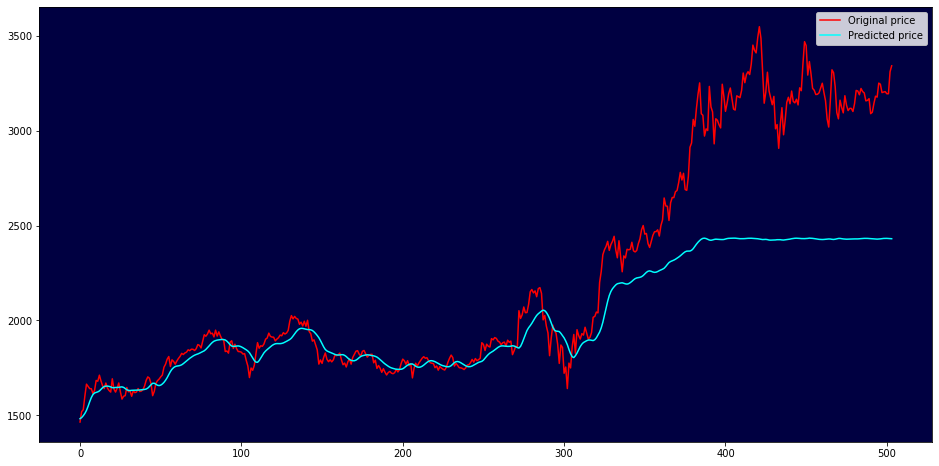

In [ ]:
# model to predict on the x_test set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# visualize original and predicted prices
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

The predictive model for Amazon stock was saved and it can be used in the future to predict Open prices. The graph above didn't result in the best match to the original prices because of the high volatility in the recent years.

# Thank You